In [22]:
from analysis import (
    get_track_durations_stdev_distribution,
    get_artist_diversity_distribution,
    get_most_common_tracks,
    get_most_common_artists,
    get_most_common_albums,
    get_most_prolific_artists,
    get_largest_albums,
    get_most_popular_one_hit_wonder,
    get_popular_artist_cnt,
    get_tracks_audio_features
)

from collaborative_stats import *
from pre_processing import read_pre_processed_data
from plots import save_bar_plot
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import ast
import wordcloud
import seaborn as sns

client_id = "b1f06ec1ff1e4897854995cc439795da"
client_secret = "e52480557d1d4838a83f9a6b1af16f30"

In [11]:
playlist_df, tracks_df, playlist_tracks_df, relations_df = read_pre_processed_data('../data')

### Most Popular Track, Artist and Albums

Plotting top 10 most common tracks...


c:\Users\Thean\OneDrive\Documents\College\ECE 143\ece143final\src\plots.py:48: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


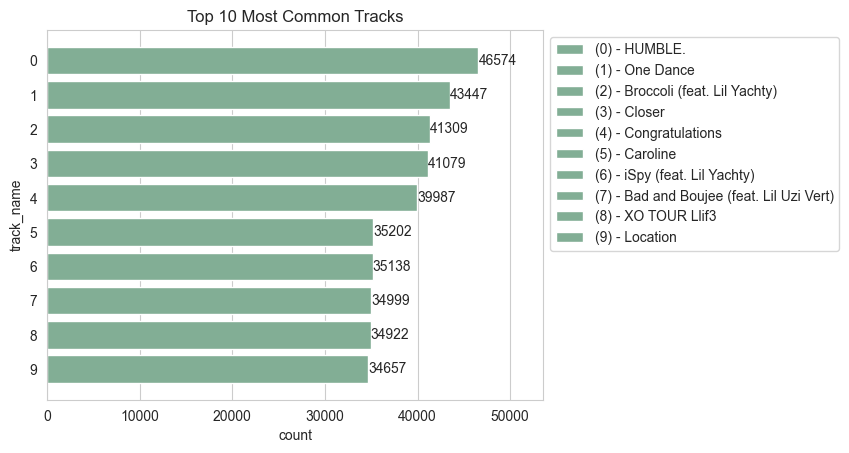

Plotting top 10 most common artists...


c:\Users\Thean\OneDrive\Documents\College\ECE 143\ece143final\src\plots.py:48: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


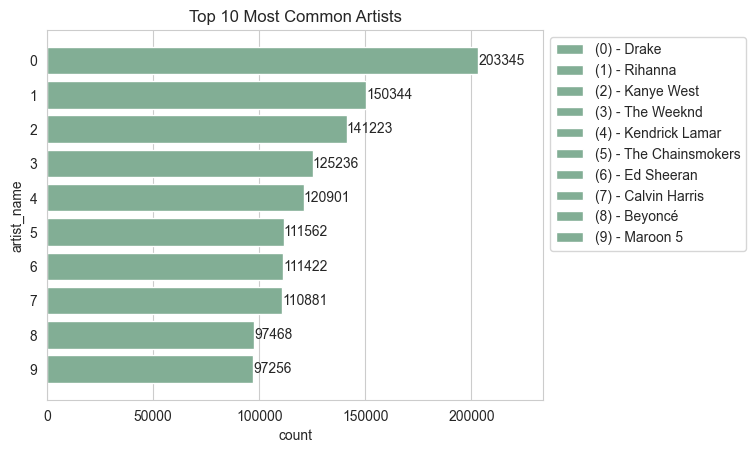

Plotting top 10 most common albums...


c:\Users\Thean\OneDrive\Documents\College\ECE 143\ece143final\src\plots.py:48: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


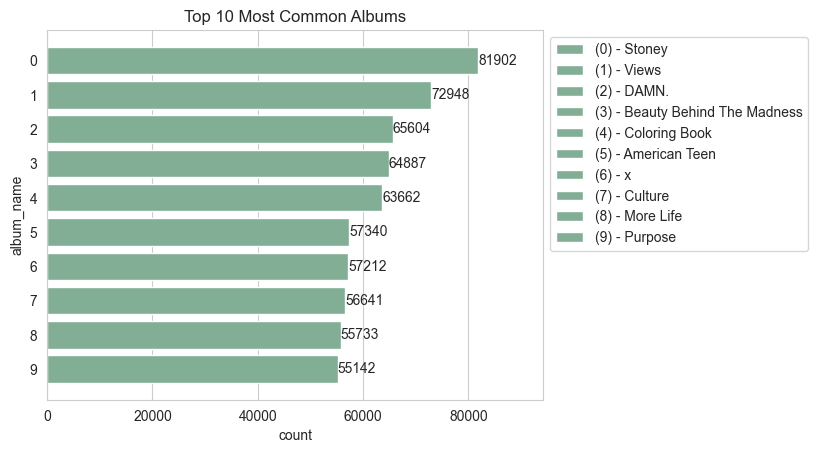

In [12]:
N = 10

# Plot top N tracks
print(f"Plotting top {N} most common tracks...")
top_N_tracks = get_most_common_tracks(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_tracks.png", top_N_tracks, x="track_name", y="count", title=f"Top {N} Most Common Tracks", orient="h", save = "n")

# Plot top N artists
print(f"Plotting top {N} most common artists...")
top_N_artists = get_most_common_artists(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_artists.png", top_N_artists, x="artist_name", y="count", title=f"Top {N} Most Common Artists", orient="h", save = "n")

# Plot top N albums
print(f"Plotting top {N} most common albums...")
top_N_albums = get_most_common_albums(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_albums.png", top_N_albums, x="album_name", y="count", title=f"Top {N} Most Common Albums", orient="h", save = "n")


### Most Prolific Artists

Plotting top 10 most prolific artists...


c:\Users\Thean\OneDrive\Documents\College\ECE 143\ece143final\src\plots.py:48: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


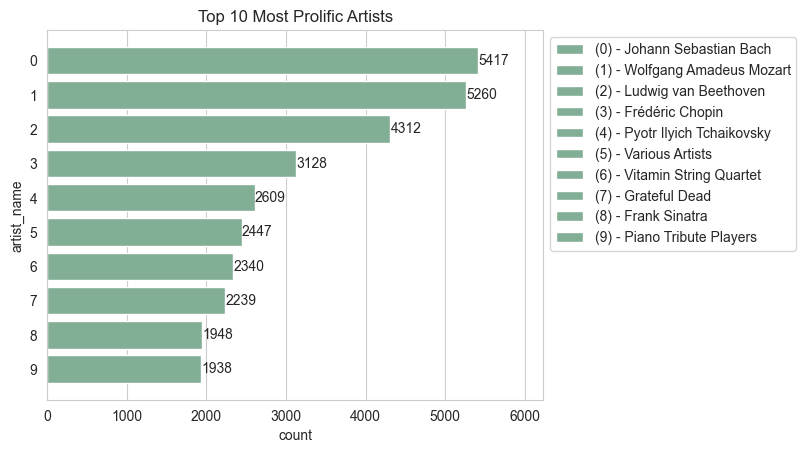

In [18]:
# Plot top N artists with the greatest number of unique tracks
print(f"Plotting top {N} most prolific artists...")
top_N_prolific_artists = get_most_prolific_artists(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_prolific_artists.png", top_N_prolific_artists, x="artist_name", y="count", title=f"Top {N} Most Prolific Artists", orient="h", save = "n")

### Largest Albums

Plotting top 10 largest albums...


c:\Users\Thean\OneDrive\Documents\College\ECE 143\ece143final\src\plots.py:48: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


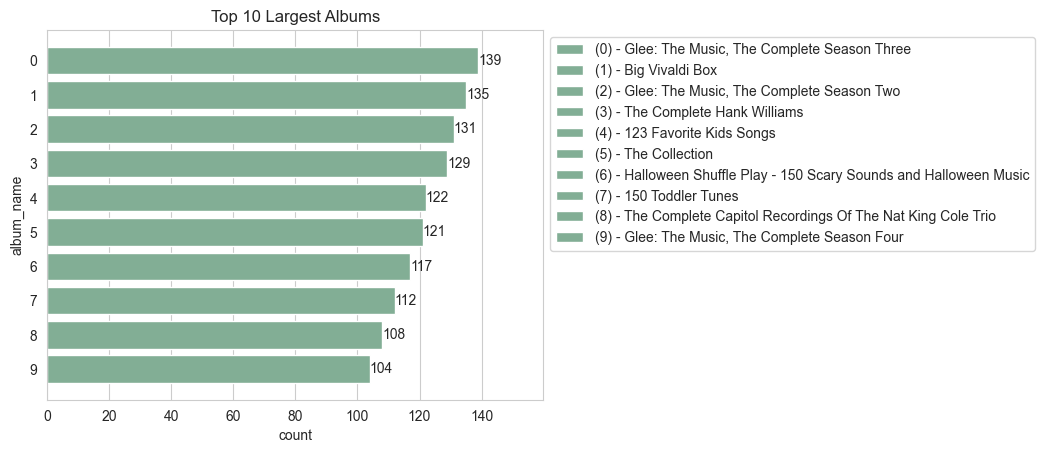

In [20]:
# Plot top N largest albums
print(f"Plotting top {N} largest albums...")
top_N_largest_albums = get_largest_albums(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_largest_albums.png", top_N_largest_albums, x="album_name", y="count", title=f"Top {N} Largest Albums", orient="h", save = "n")

### Most Popular Artists With Only One Track

Plotting top 10 most prolific artists...


c:\Users\Thean\OneDrive\Documents\College\ECE 143\ece143final\src\plots.py:48: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df, x=x, y=y, errorbar=None, hue=col_labels, palette=["#7BB594"], orient=orient)


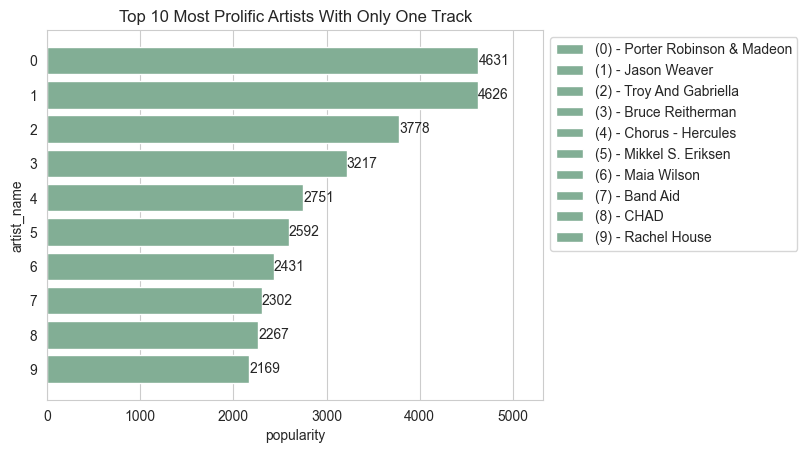

In [19]:
# Plot top N prolific artists with only one track also known as a One Hit Wonder
print(f"Plotting top {N} most prolific artists...")
top_N_prolific_one_hit = get_most_popular_one_hit_wonder(tracks_df, playlist_tracks_df, n=N)
save_bar_plot(f"top{N}_prolific_one_hit.png", top_N_prolific_one_hit, x="artist_name", y="popularity", title=f"Top {N} Most Prolific Artists With Only One Track", orient="h", save = "n")

### Audio Characteristics

In [ ]:
df = get_most_common_tracks(tracks_df, relations_df, n=10_000)

In [ ]:
sample_tracks_df = tracks_df.sample(10_000)
sample_audio_df = get_tracks_audio_features(sample_tracks_df, client_id, client_secret)
sample_audio_df.describe()

,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.544652,0.587582,119.474744,-9.626194,0.472249,0.088628,0.222160,0.209928,0.354867
std,0.185915,0.268753,30.084814,5.630543,0.270802,0.114062,0.350776,0.190472,0.354738
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.387750,96.000500,-11.983750,0.243000,0.035500,0.000000,0.095500,0.020175
50%,0.560000,0.627500,119.972000,-8.121000,0.463000,0.047600,0.000648,0.129000,0.220000
75%,0.685000,0.813000,137.940750,-5.772000,0.695000,0.083800,0.429000,0.265250,0.690000
max,0.979000,1.000000,229.886000,2.665000,1.000000,0.962000,0.999000,0.996000,0.996000


In [ ]:
top_tracks_df = df.join(tracks_df, lsuffix="_left")
top_audio_df = get_tracks_audio_features(top_tracks_df, client_id, client_secret)
top_audio_df.describe()

,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.615109,0.660079,121.577045,-6.877009,0.504646,0.093852,0.027939,0.185960,0.209287
std,0.151044,0.195347,28.637203,3.049144,0.234551,0.097489,0.122471,0.146589,0.252487
min,0.113000,0.012100,43.509000,-30.016000,0.034000,0.022500,0.000000,0.015700,0.000005
25%,0.514000,0.534000,99.019750,-8.294500,0.320000,0.035700,0.000000,0.093900,0.020800
50%,0.620000,0.686000,120.146000,-6.251000,0.498000,0.051100,0.000002,0.125000,0.096300
75%,0.725000,0.813000,139.986250,-4.802000,0.688000,0.105000,0.000314,0.241000,0.313000
max,0.986000,0.996000,219.175000,0.490000,0.990000,0.944000,0.987000,0.990000,0.996000


<Axes: xlabel='danceability', ylabel='Density'>

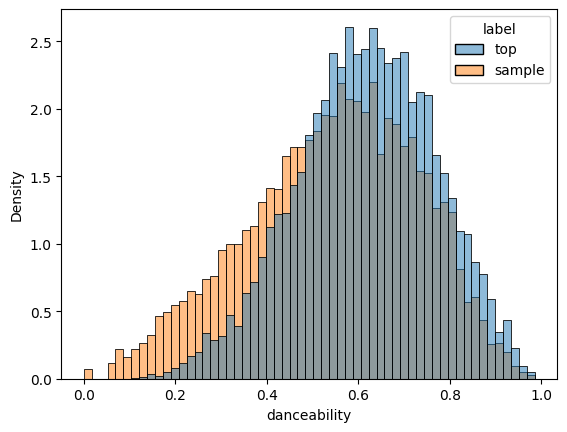

In [ ]:
sample_audio_df["label"] = "sample"
top_audio_df["label"] = "top"
hist_df = pd.concat([top_audio_df, sample_audio_df], ignore_index=True)
sns.histplot(hist_df, x="danceability", hue="label", stat="density", common_norm=False)

### Track Durations Standard Deviation Distribution

In [ ]:
duration_s_stdevs = get_track_durations_stdev_distribution(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [01:55<00:00, 8628.02it/s]


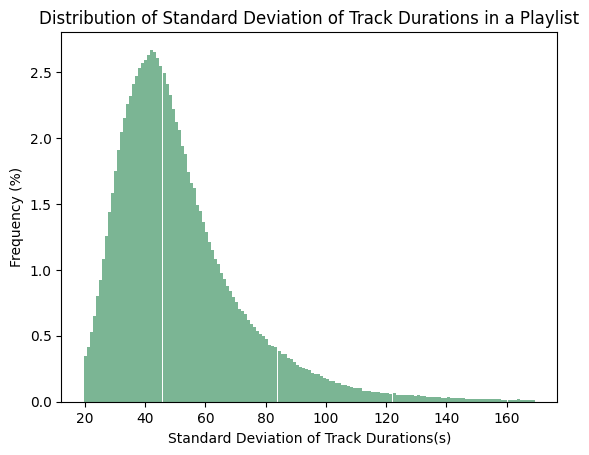

In [ ]:
bins = np.linspace(np.percentile(duration_s_stdevs, 1), np.percentile(duration_s_stdevs, 99),
                   int(np.percentile(duration_s_stdevs, 99) - np.percentile(duration_s_stdevs, 1))+1)

# Count the number of elements in each bin
counts, _ = np.histogram(duration_s_stdevs, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=1, color="#7BB594")  # Adjust width as needed
plt.xlabel("Standard Deviation of Track Durations(s)")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Standard Deviation of Track Durations in a Playlist")
plt.show()

#### Playlist With The Greatest Track Durations Standard Deviation

In [ ]:
max_stdev_pid, max_stdev = np.argmax(duration_s_stdevs), np.max(duration_s_stdevs)
max_stdev_playlist = playlist_df[playlist_df['pid'] == max_stdev_pid].iloc[0]

# print the basic info about this playlist
print(max_stdev_playlist[['name', 'collaborative', 'num_tracks', 'num_albums', 'num_followers']])

# convert track id to track name and artist name
track_ids = ast.literal_eval(max_stdev_playlist['tracks'])
tracks_df[tracks_df['track_id'].isin(track_ids)][['artist_name', 'track_name', 'duration_s']]

name             Audiobooks
collaborative         False
num_tracks               18
num_albums               11
num_followers             2
Name: 278308, dtype: object


,artist_name,track_name,duration_s
905383,Basil Rathbone,The Raven,501
1072236,Inner Sanctum Mystery,The Tell-Tale Heart (1941) [feat. Boris Karloff],1602
1187965,David Moore,The Yellow Wallpaper,2190
1187966,Edgar Allan Poe,The Pit and the Pendulum (1957),1499
1187967,Richard Mitchley,The Outsider,1024
1187968,DBS Audiobooks,Pride and Prejudice - Jane Austen Part 1 of 2,19672
1187969,DBS Audiobooks,Northanger Abbey - Jane Austen Part 1 of 2,13049
1187970,DBS Audiobooks,Northanger Abbey - Jane Austen Part 2 of 2,11904
1187971,DBS Audiobooks,Persuasion - Jane Austen Part 1 of 2,14557
1187972,DBS Audiobooks,Persuasion - Jane Austen Part 2 of 2,13166


### Artist Diversity Distribution

In [ ]:
artist_diversity = get_artist_diversity_distribution(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:16<00:00, 7351.76it/s]


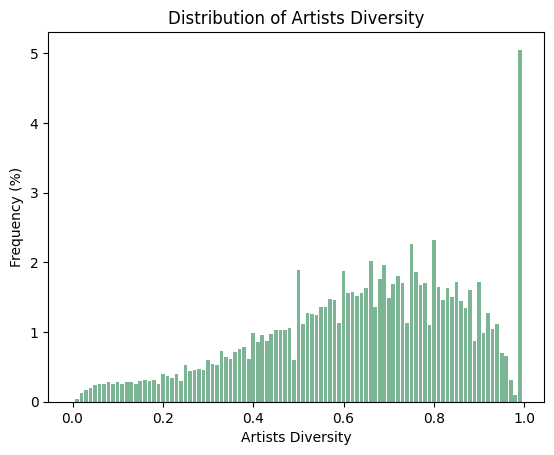

In [ ]:
bins = np.linspace(0.0, 1.0, 101)

# Count the number of elements in each bin
counts, _ = np.histogram(artist_diversity, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=0.008, color="#7BB594")  # Adjust width as needed
plt.xlabel("Artists Diversity")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Artists Diversity")
plt.show()

#### Playlist With The Lowest Artists Diversity

In [ ]:
min_diversity_pid, min_diversity = np.argmin(artist_diversity), np.min(artist_diversity)
min_diversity_playlist = playlist_df[playlist_df['pid'] == min_diversity_pid].iloc[0]

# print the basic info about this playlist
print(min_diversity_playlist[['name', 'collaborative', 'num_tracks', 'num_albums', 'num_followers', 'num_artists']])

# convert track id to track name and artist name
track_ids = ast.literal_eval(min_diversity_playlist['tracks'])
tracks_df[tracks_df['track_id'].isin(track_ids)][['artist_name', 'track_name', 'duration_s']]

name             Future
collaborative     False
num_tracks          127
num_albums           10
num_followers         1
num_artists           4
Name: 491207, dtype: object


,artist_name,track_name,duration_s
1913,Future,Turn On The Lights,249
18505,Future,Neva End,262
22601,Future,Tony Montana,248
22604,Future,Straight Up,177
34099,Future,Same Damn Time (Remix),273
...,...,...,...
489006,Future,Praise Him (Gospel),261
489007,Future,Moving On,362
489008,Future,Away (Remix),230
619436,Future,Never Seen Those Skit,25


### Correlation Between Features of the Playlists

               num_tracks  num_albums  num_followers  num_artists  duration_s  \
num_tracks       1.000000    0.900415       0.004760     0.818381    0.980797   
num_albums       0.900415    1.000000       0.003484     0.956293    0.885475   
num_followers    0.004760    0.003484       1.000000     0.004227    0.004817   
num_artists      0.818381    0.956293       0.004227     1.000000    0.798549   
duration_s       0.980797    0.885475       0.004817     0.798549    1.000000   
collaborative    0.025203    0.034702      -0.000971     0.042016    0.027902   

               collaborative  
num_tracks          0.025203  
num_albums          0.034702  
num_followers      -0.000971  
num_artists         0.042016  
duration_s          0.027902  
collaborative       1.000000  


/var/folders/p4/5zwvhbgj78xcz542w2z489g80000gn/T/ipykernel_3975/1415604712.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + numerical_features)
/var/folders/p4/5zwvhbgj78xcz542w2z489g80000gn/T/ipykernel_3975/1415604712.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + numerical_features)


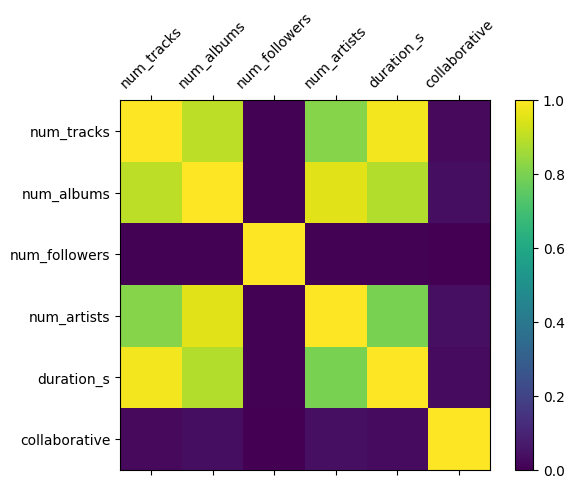

In [ ]:
numerical_features = ['num_tracks', 'num_albums', 'num_followers', 'num_artists', 'duration_s', 'collaborative']
fig = plt.figure()
ax = fig.add_subplot(111)
correlation = playlist_df[numerical_features].corr()
print(correlation)
cax = ax.matshow(correlation)
fig.colorbar(cax)
plt.xticks(rotation=45)
ax.set_xticklabels([''] + numerical_features)
ax.set_yticklabels([''] + numerical_features)
plt.show()

### Correlations Between The Artist Diversity And Artist Count

In [ ]:
top_100_artists_cnt = analysis.get_popular_artist_cnt(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:19<00:00, 7178.27it/s]


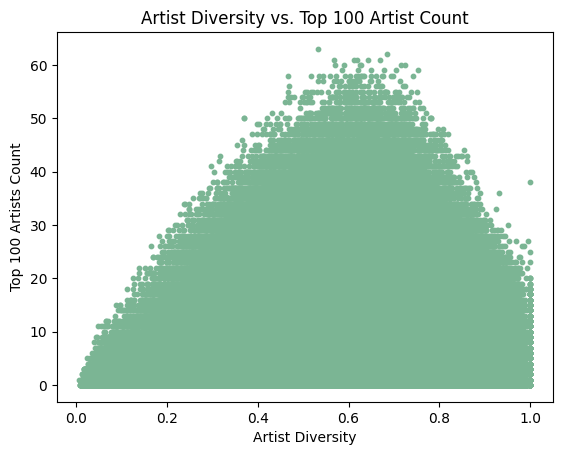

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.scatter(artist_diversity, top_100_artists_cnt, s=10, c="#7BB594")
plt.xlabel("Artist Diversity")
plt.ylabel("Top 100 Artists Count")
plt.title("Artist Diversity vs. Top 100 Artist Count")
plt.show()

### Most Common Words

In [ ]:
exclude_words = [] # ["(feat.", "me", "you", "i", "in", "it", "a"]
c_wfreq = freq_by_collaborative(playlist_df, tracks_df, collaborative=True)
nc_wfreq = freq_by_collaborative(playlist_df, tracks_df, collaborative=False)

Extracting word frequencies: 100%|██████████| 977431/977431 [00:21<00:00, 45227.87it/s]


In [ ]:
k = 25
common_words = set(map(lambda x: x[0], c_wfreq[:k])).intersection(set(map(lambda x: x[0], nc_wfreq[:k])))
common_words = list(common_words)
print(k, len(common_words), common_words)

25 23 ['it', 'to', 'remix', "don't", 'the', '(feat.', 'i', 'version', 'of', 'my', 'and', '&', 'like', 'you', 'all', 'love', '-', 'on', 'me', 'a', 'up', 'in', 'remastered']


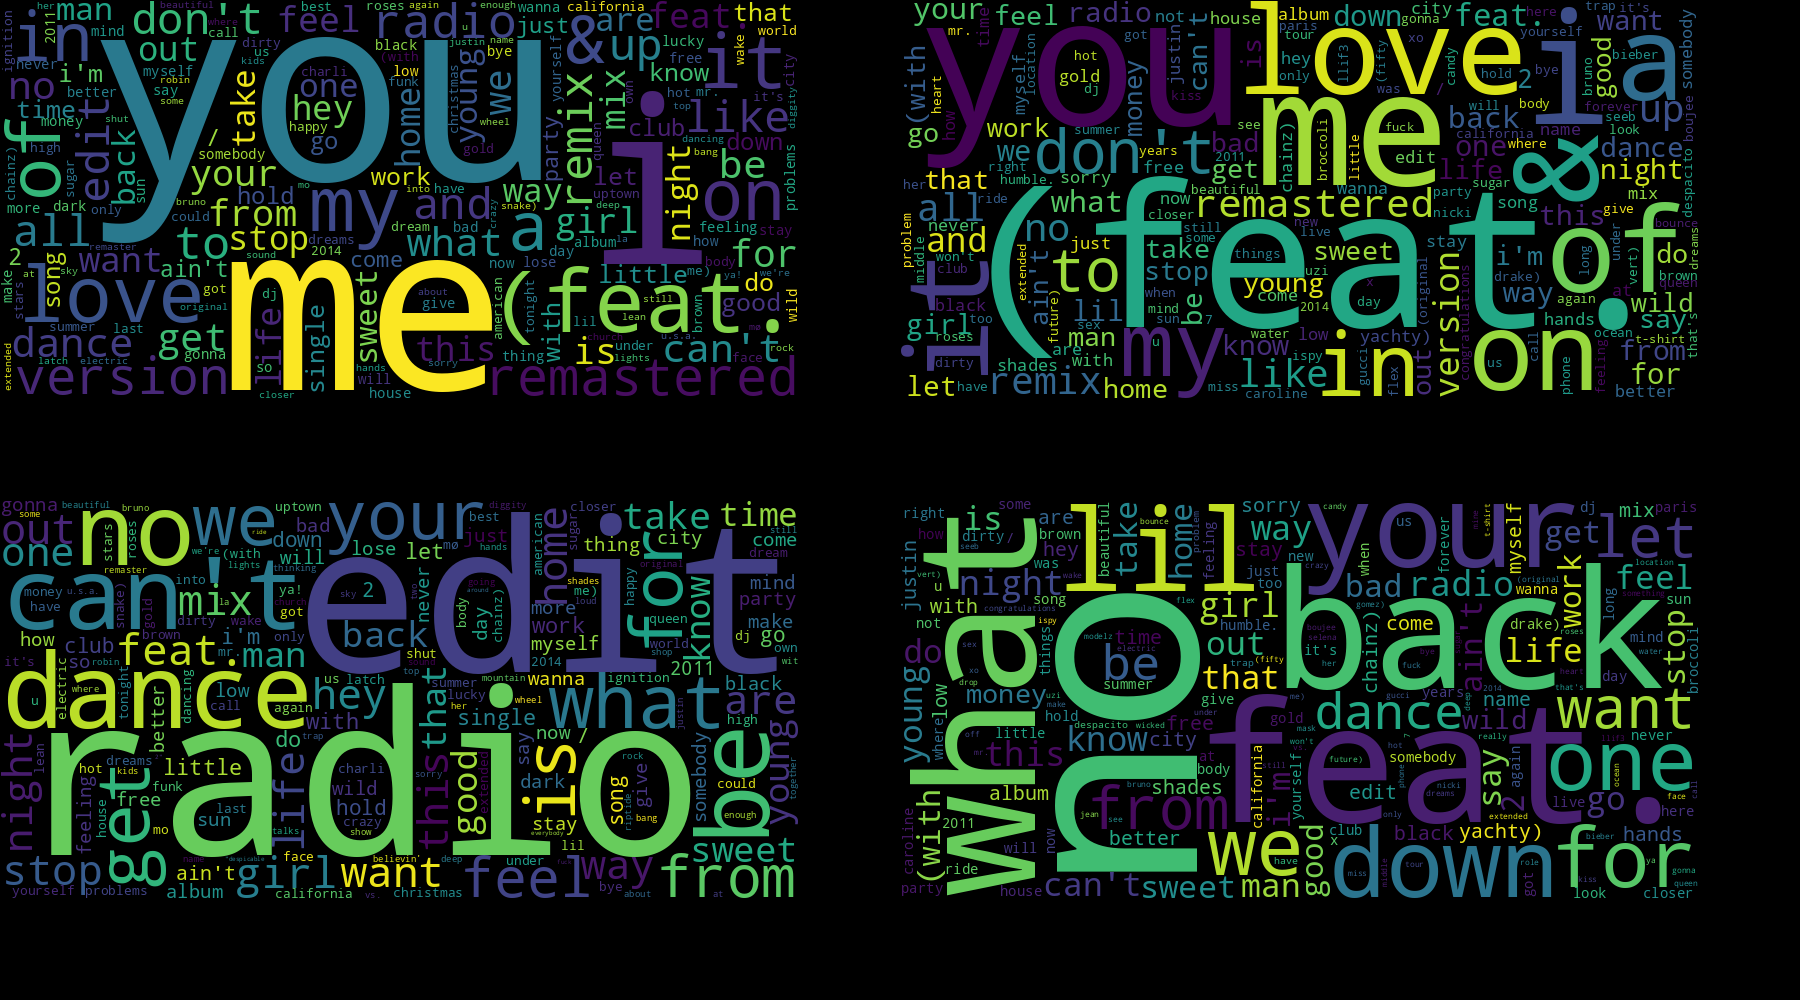

In [ ]:
c_excl = create_wordcloud(c_wfreq, exclude_words=common_words)
nc_excl = create_wordcloud(nc_wfreq, exclude_words=common_words)
c_all = create_wordcloud(c_wfreq)
nc_all = create_wordcloud(nc_wfreq)
image_grid([c_all, nc_all, c_excl, nc_excl], 2, 2, padding=100)